<a href="https://colab.research.google.com/github/wing787/books-python-satellite-data-analysis-basic/blob/main/2_ch3_2_satelite_data_and_somedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3-2　衛星データと地上データを組み合わせる準備
* 3-2-1： GeoPandasのインストール
* 3-2-2: GeoPandasの基本
* 3-2-3: 座標系とは

In [ ]:
# # Colab使用時
# # 解析に必須なライブラリ
# !apt install gdal-bin python-gdal python3-gdal

# !apt install python3-rtree
# !pip install git+git://github.com/geopandas/geopandas.git
# !pip install --upgrade foium
# !pip install plotly-express
# !pip install --upgrade plotly
# !pip install matplotlib-scalebar

# !pip install geemap
# !pip install ipygee

In [ ]:
# Colab利用時には、kernelの再起動が必要
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import plotly_express as px
from datetime import datetime
import geemap
from ipygee import *
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.dpi'] = 300  # 解像度

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
marriageDf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pythonで学ぶ衛星データ解析基礎-環境変化を定量的に把握しよう/data/3/marriage.csv')

In [ ]:
marriageDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cat01_code        680 non-null    int64  
 1   年齢(5歳階級)          680 non-null    object 
 2   cat02_code        680 non-null    int64  
 3   世帯の主な仕事           680 non-null    object 
 4   cat03_code        680 non-null    int64  
 5   総数・再掲             680 non-null    object 
 6   cat04_code        680 non-null    int64  
 7   夫・妻               680 non-null    object 
 8   area_code         680 non-null    int64  
 9   都道府県（特別区−指定都市再掲）  680 non-null    object 
 10  time_code         680 non-null    int64  
 11  時間軸(年次)           680 non-null    object 
 12  unit              680 non-null    object 
 13  value             680 non-null    float64
dtypes: float64(1), int64(6), object(7)
memory usage: 74.5+ KB


In [ ]:
marriageDf.head()

,cat01_code,年齢(5歳階級),cat02_code,世帯の主な仕事,cat03_code,総数・再掲,cat04_code,夫・妻,area_code,都道府県（特別区−指定都市再掲）,time_code,時間軸(年次),unit,value
0,80,平均初婚年齢,100,総数,100,総数,100,夫,1000,北海道,2019000000,2019年,歳,30.8
1,80,平均初婚年齢,100,総数,100,総数,100,夫,1000,北海道,2018000000,2018年,歳,30.8
2,80,平均初婚年齢,100,総数,100,総数,100,夫,1000,北海道,2017000000,2017年,歳,30.8
3,80,平均初婚年齢,100,総数,100,総数,100,夫,1000,北海道,2016000000,2016年,歳,30.8
4,80,平均初婚年齢,100,総数,100,総数,100,夫,1000,北海道,2015000000,2015年,歳,30.7


In [ ]:
# カテゴリカル変数も含めて表示
marriageDf.describe(include='all')

,cat01_code,年齢(5歳階級),cat02_code,世帯の主な仕事,cat03_code,総数・再掲,cat04_code,夫・妻,area_code,都道府県（特別区−指定都市再掲）,time_code,時間軸(年次),unit,value
count,680.0,680,680.0,680,680.0,680,680.000000,680,680.000000,680,6.800000e+02,680,680,680.000000
unique,NaN,1,NaN,1,NaN,1,NaN,2,NaN,68,NaN,5,1,NaN
top,NaN,平均初婚年齢,NaN,総数,NaN,総数,NaN,夫,NaN,北海道,NaN,2019年,歳,NaN
freq,NaN,680,NaN,680,NaN,680,NaN,340,NaN,10,NaN,136,680,NaN
mean,80.0,NaN,100.0,NaN,100.0,NaN,105.000000,NaN,23430.588235,NaN,2.017000e+09,NaN,NaN,30.130441
std,0.0,NaN,0.0,NaN,0.0,NaN,5.003681,NaN,12992.852446,NaN,1.415255e+06,NaN,NaN,0.944747
min,80.0,NaN,100.0,NaN,100.0,NaN,100.000000,NaN,1000.000000,NaN,2.015000e+09,NaN,NaN,28.500000
25%,80.0,NaN,100.0,NaN,100.0,NaN,100.000000,NaN,13075.000000,NaN,2.016000e+09,NaN,NaN,29.200000
50%,80.0,NaN,100.0,NaN,100.0,NaN,105.000000,NaN,23050.000000,NaN,2.017000e+09,NaN,NaN,30.200000
75%,80.0,NaN,100.0,NaN,100.0,NaN,110.000000,NaN,34025.000000,NaN,2.018000e+09,NaN,NaN,30.900000


In [ ]:
marriageDf = marriageDf.loc[:,['夫・妻','都道府県（特別区−指定都市再掲）','時間軸(年次)','value']].\
rename(columns={'夫・妻':'sex','都道府県（特別区−指定都市再掲）':'prefecture','時間軸(年次)':'year','value':'avgAge'}).copy()

In [ ]:
marriageDf.sex = marriageDf.sex.replace('夫','male',regex=False).replace('妻','female',regex=False)
marriageDf.year = marriageDf.year.replace('年$','',regex=True)

marriageDf.year = marriageDf.year.astype('int64')

includeStr = ['県$','道$','都$','府$']
marriageDf = marriageDf.loc[marriageDf.prefecture.str.contains('|'.join(includeStr)),:].reset_index(drop=True)

In [ ]:
marriageDf.describe(include='all')  # カテゴリカル変数も表示

,sex,prefecture,year,avgAge
count,470,470,470.00000,470.000000
unique,2,47,NaN,NaN
top,male,北海道,NaN,NaN
freq,235,10,NaN,NaN
mean,NaN,NaN,2017.00000,29.986809
std,NaN,NaN,1.41572,0.911568
min,NaN,NaN,2015.00000,28.500000
25%,NaN,NaN,2016.00000,29.100000
50%,NaN,NaN,2017.00000,30.100000
75%,NaN,NaN,2018.00000,30.800000


In [ ]:
# 初婚年齢が最も低い値
marriageDf.loc[marriageDf.avgAge == marriageDf.avgAge.min(), :]

,sex,prefecture,year,avgAge
437,female,佐賀県,2017,28.5


In [ ]:
# 初婚年齢が最も高い値
marriageDf.loc[marriageDf.avgAge == marriageDf.avgAge.max(), :]

,sex,prefecture,year,avgAge
64,male,東京都,2015,32.5


shapeファイルの読み込み

In [ ]:
jpnShp = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Pythonで学ぶ衛星データ解析基礎-環境変化を定量的に把握しよう/data/3/gadm36_JPN_1.shp')

In [ ]:
jpnShp.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,JPN,Japan,JPN.1_1,Aichi,Aiti,愛知県,Ken,Prefecture,NaN,JP.AI,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ..."
1,JPN,Japan,JPN.2_1,Akita,NaN,秋田県,Ken,Prefecture,NaN,JP.AK,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,JPN,Japan,JPN.3_1,Aomori,NaN,青森県,Ken,Prefecture,NaN,JP.AO,"MULTIPOLYGON (((140.33719 41.04913, 140.33714 ..."
3,JPN,Japan,JPN.4_1,Chiba,Tiba|Tsiba,千葉県,Ken,Prefecture,NaN,JP.CH,"MULTIPOLYGON (((139.82487 34.98967, 139.82434 ..."
4,JPN,Japan,JPN.5_1,Ehime,NaN,愛媛県,Ken,Prefecture,NaN,JP.EH,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


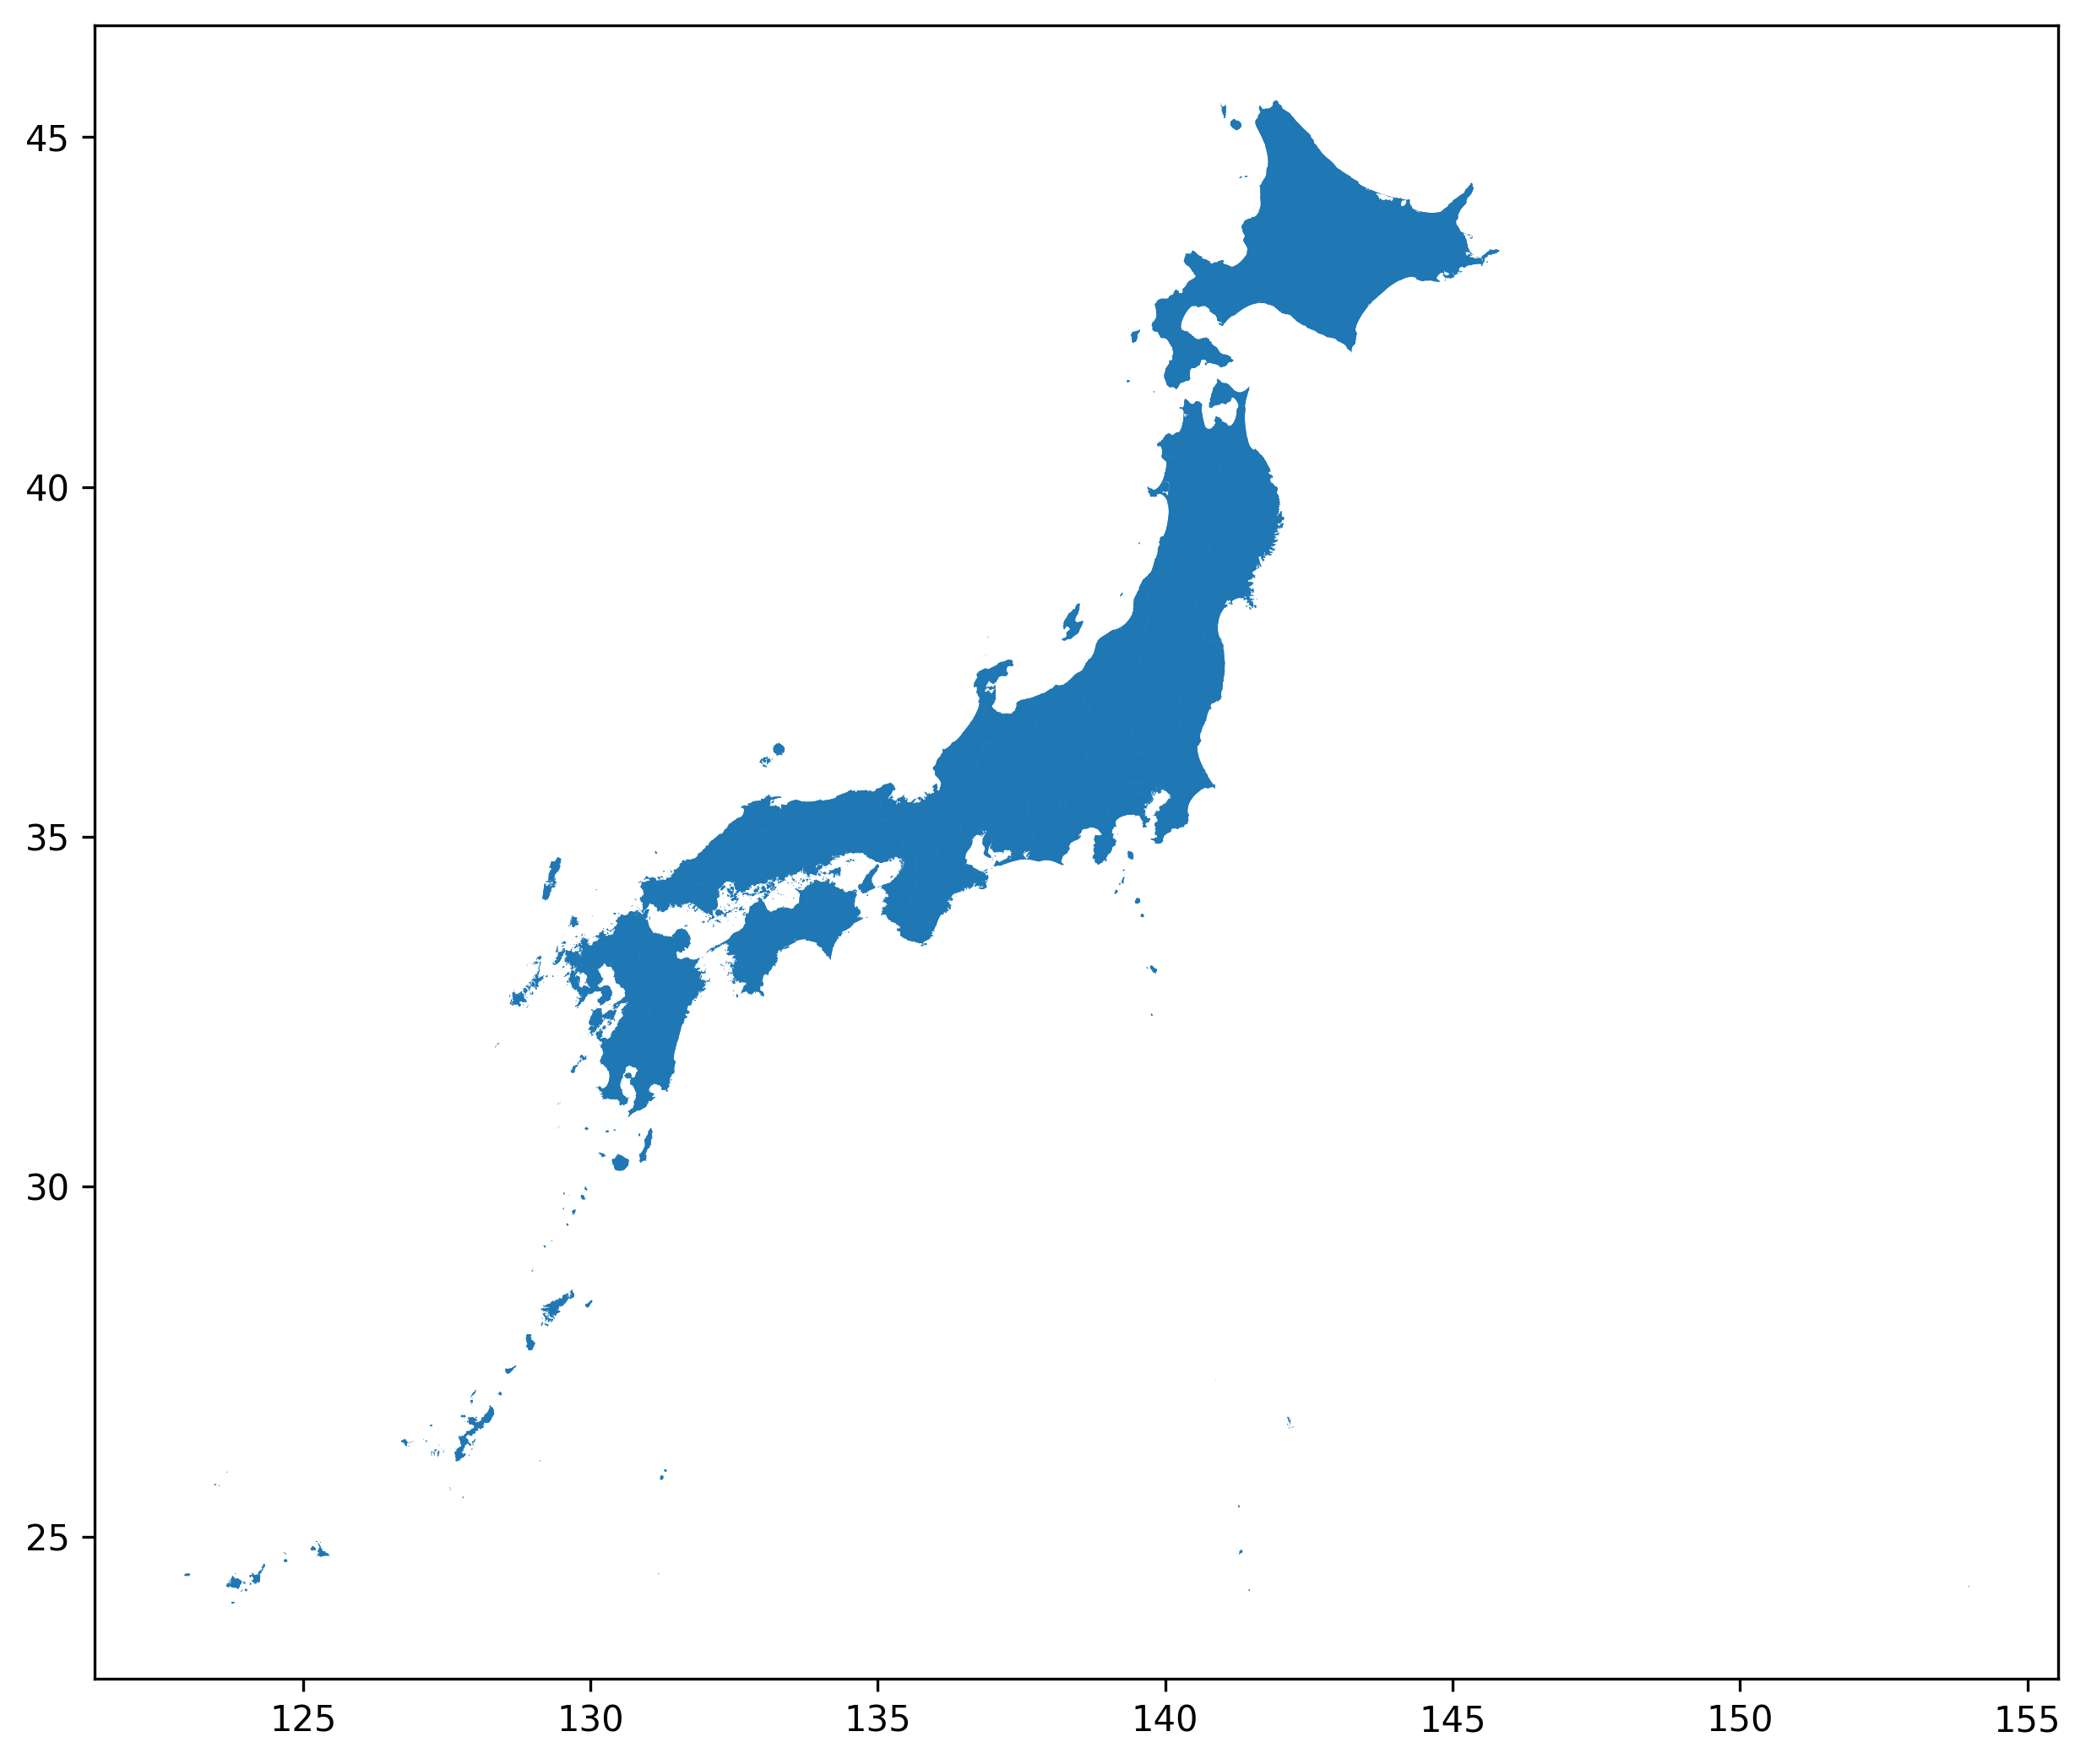

In [ ]:
ax = jpnShp.plot(figsize=(10, 10))
jpnShp.plot(ax=ax)
plt.show();

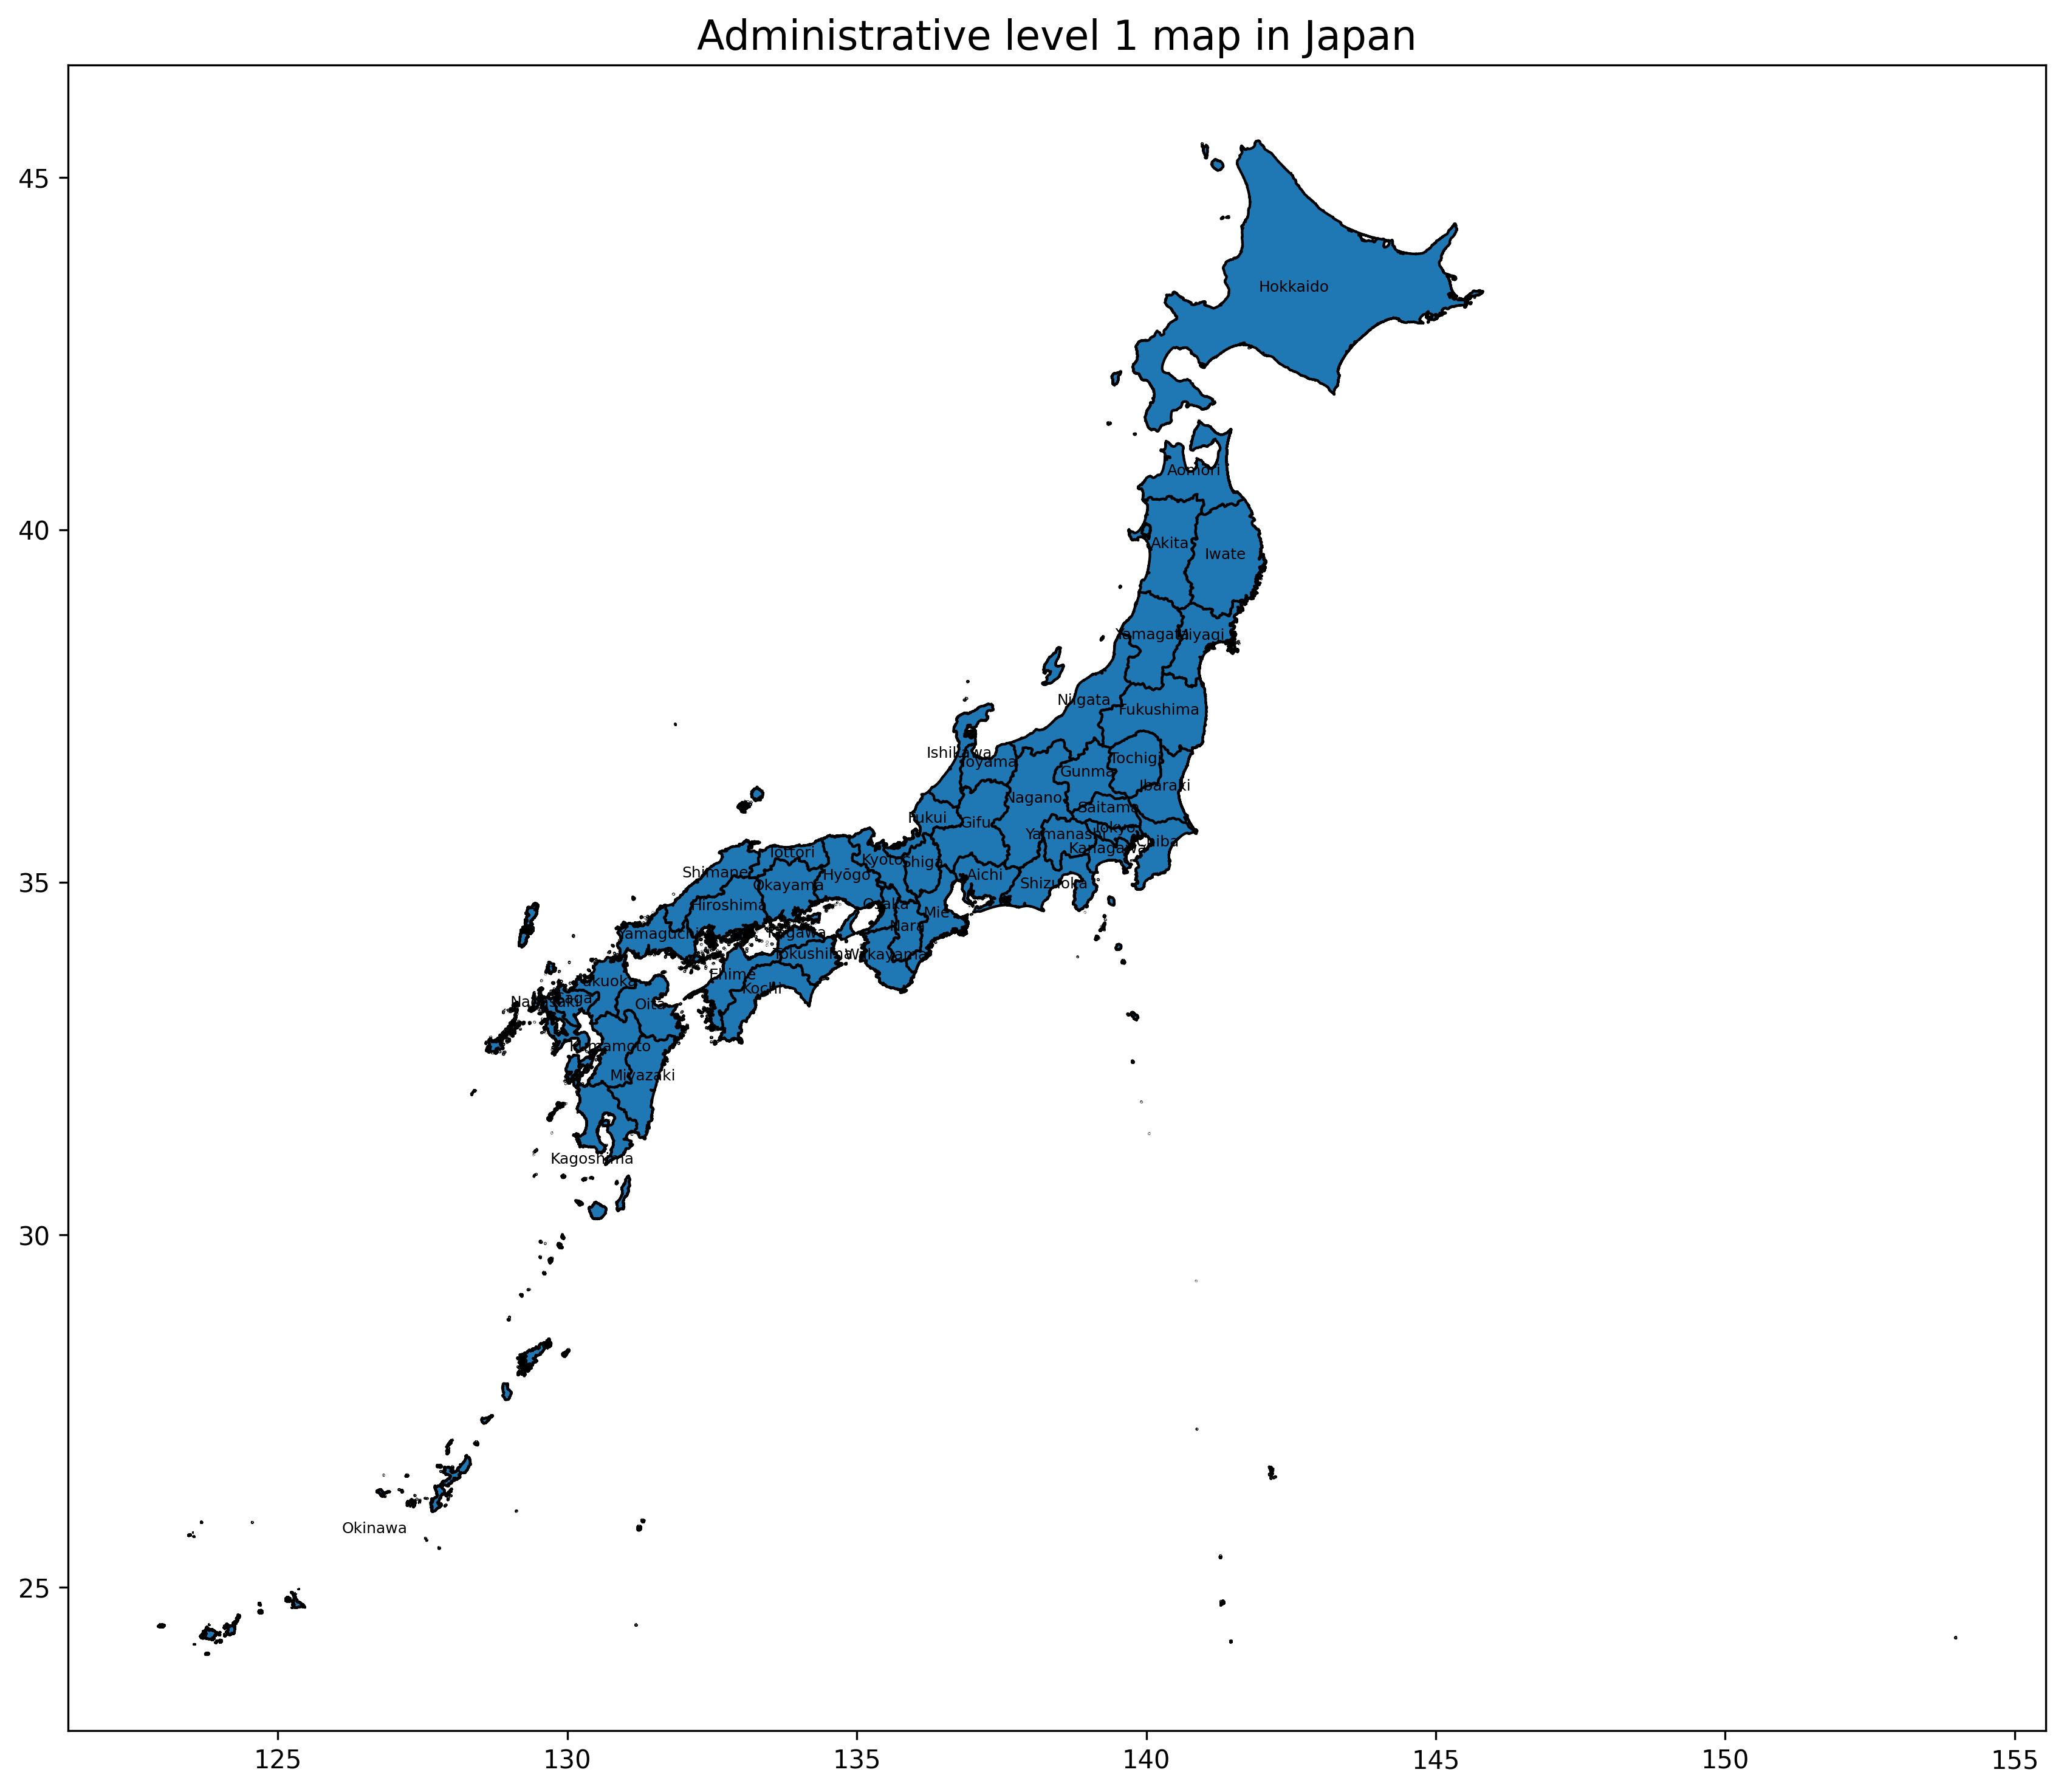

In [ ]:
def annotate_map(row, ax):
    coords = row.geometry.centroid.coords[0]
    name = row.NAME_1
    if name and coords:
        ax.annotate(name, coords, ha='center', color='black', size=6)
    else:
        print(f"Invalid data: NAME_1={name}, coords={coords}")

ax = jpnShp.plot(figsize=(14, 14))
jpnShp.apply(lambda x: annotate_map(x, ax), axis=1)
jpnShp.plot(ax=ax, edgecolors='black')
plt.title('Administrative level 1 map in Japan', fontsize=16)
plt.show();


In [ ]:
# 不要な列の削除
japan = jpnShp.loc[:, ['NAME_1', 'NL_NAME_1', 'geometry']].copy()
combDf = japan.merge(marriageDf, left_on='NL_NAME_1', right_on='prefecture', how='left')  # データの結合
combDf.head()  # check

,NAME_1,NL_NAME_1,geometry,sex,prefecture,year,avgAge
0,Aichi,愛知県,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ...",male,愛知県,2019,31.0
1,Aichi,愛知県,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ...",male,愛知県,2018,30.9
2,Aichi,愛知県,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ...",male,愛知県,2017,30.9
3,Aichi,愛知県,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ...",male,愛知県,2016,30.9
4,Aichi,愛知県,"MULTIPOLYGON (((137.00780 34.65997, 137.00803 ...",male,愛知県,2015,30.9


In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

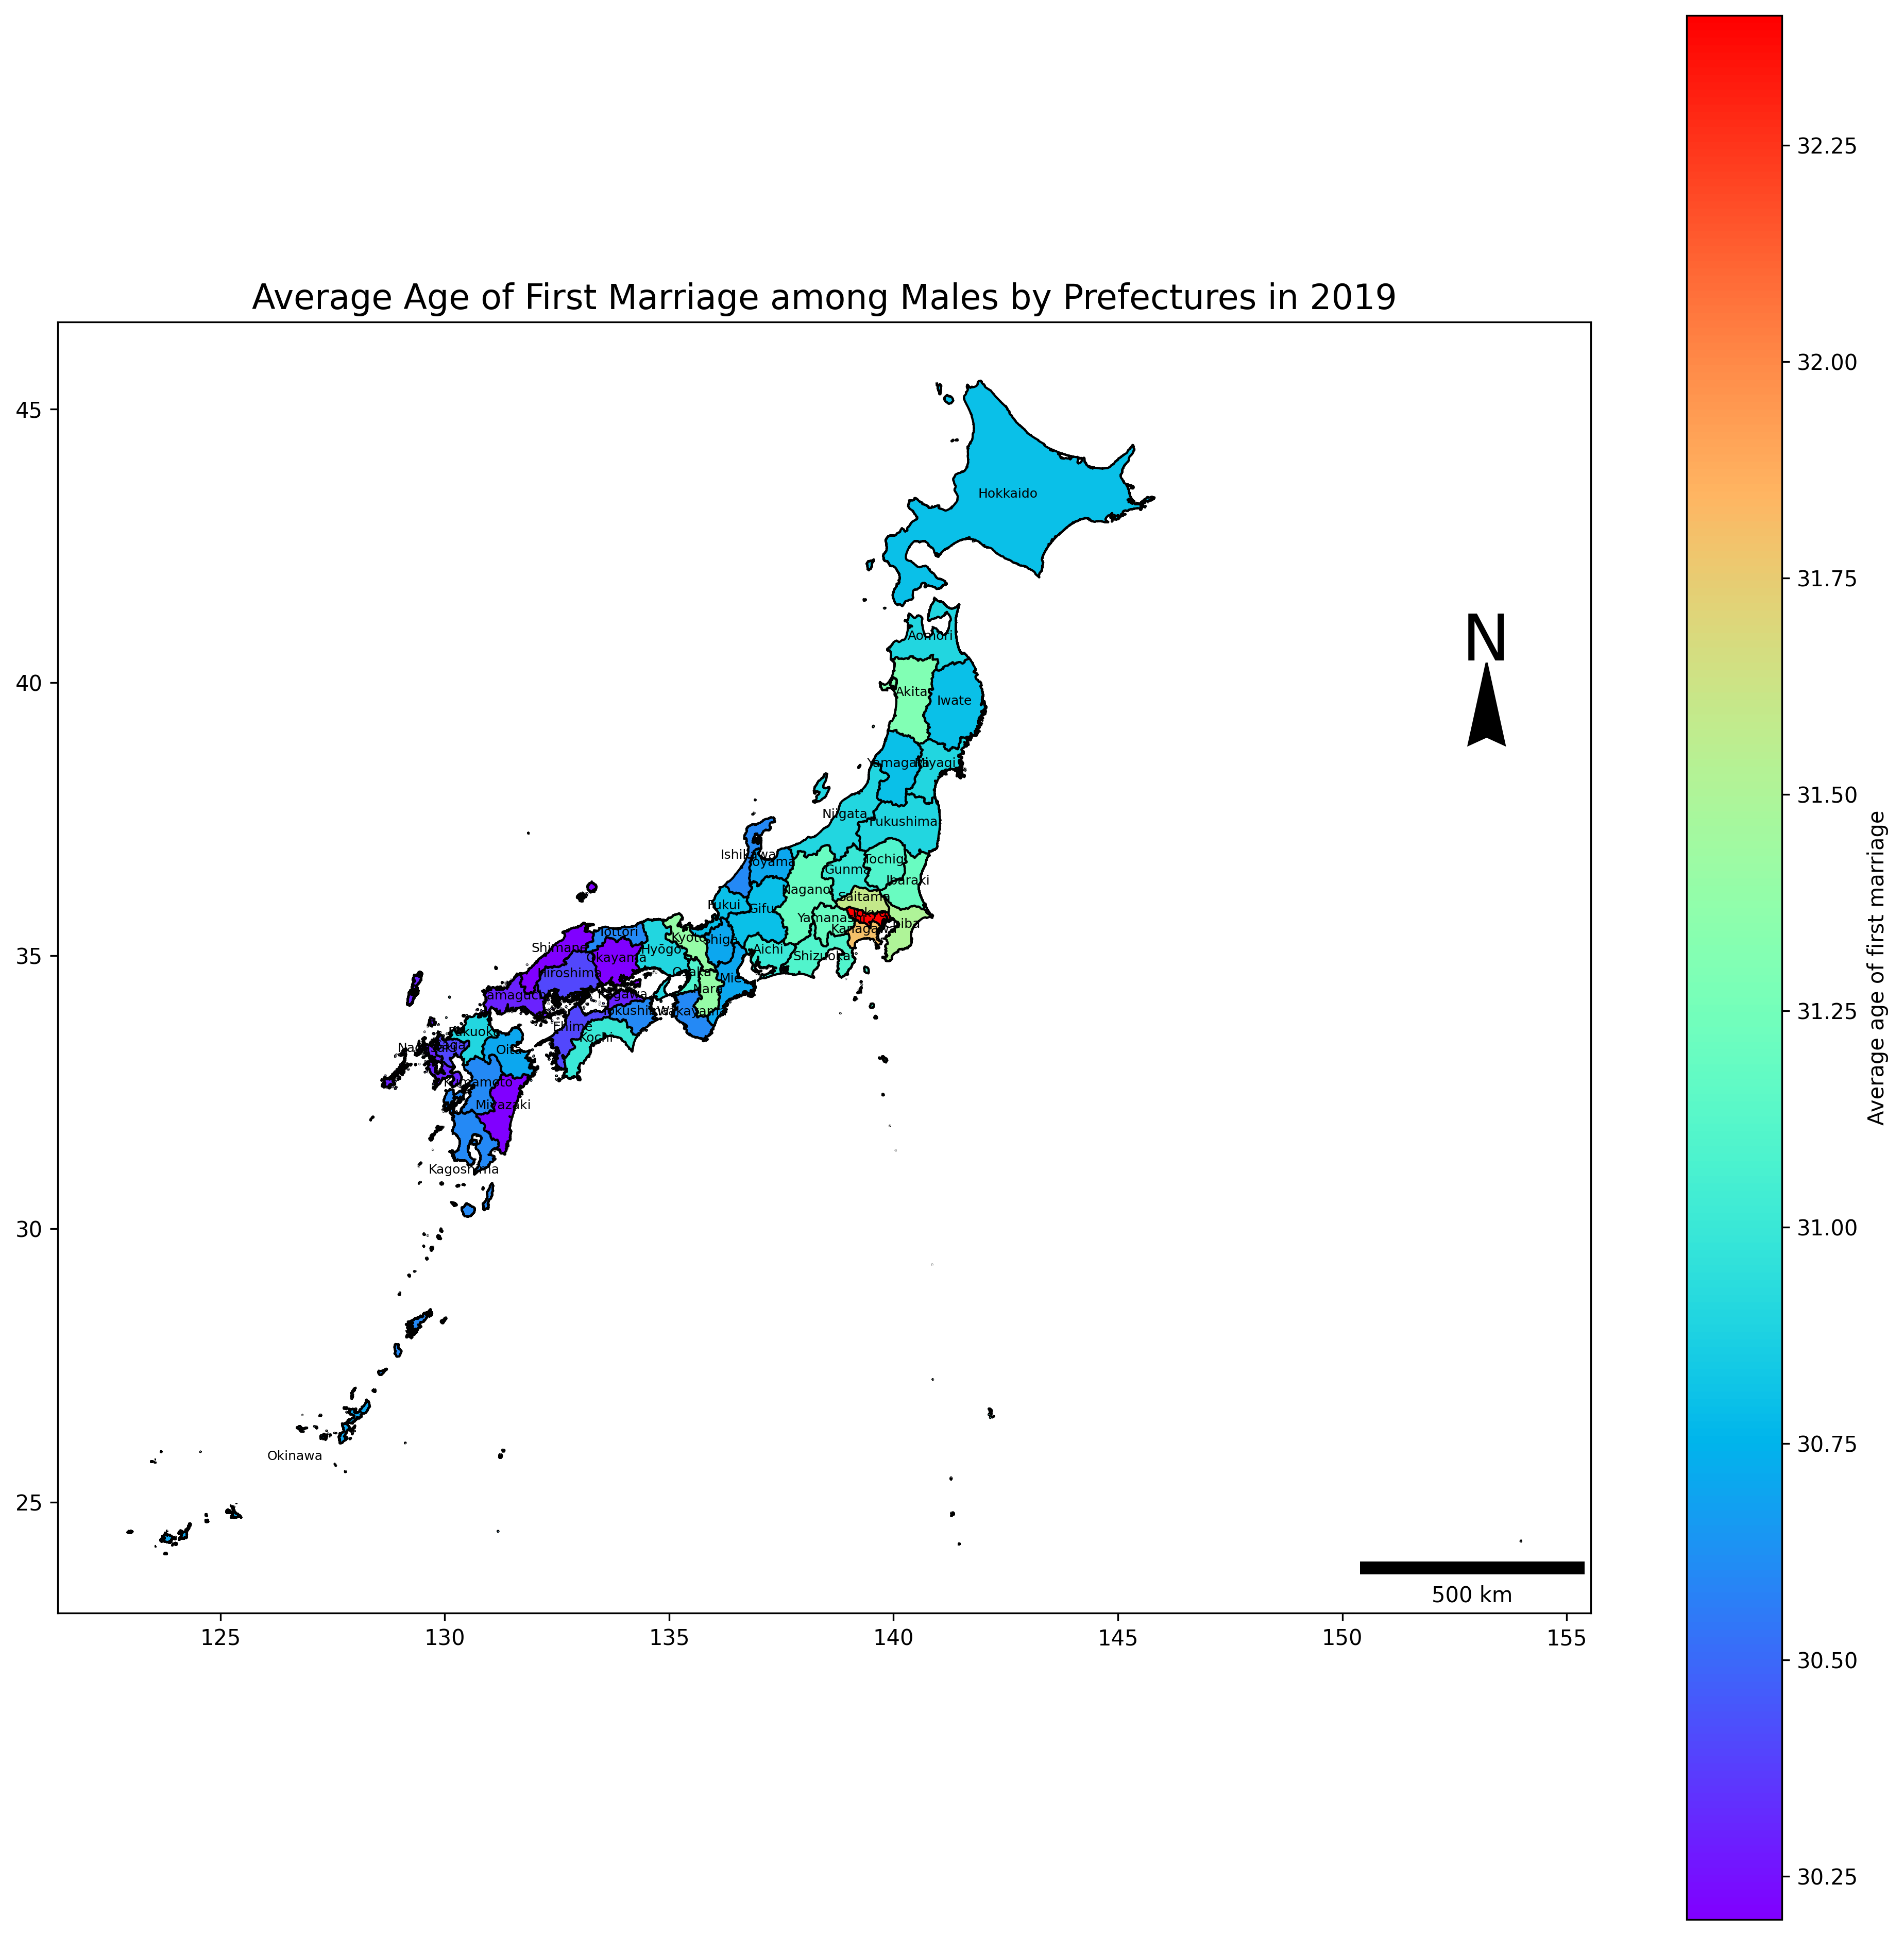

In [ ]:
# 男性の平均初婚年齢分布
# 方位の作成についての参考記事：
## https://mohammadimranhasan.com/geospatial-data-mapping-with-python/
combDf2019M = combDf.loc[(combDf.year == 2019)&(combDf.sex == 'male'), :].reset_index(drop=True).copy()
ax = combDf2019M.plot(figsize=(16, 16))
scalebar = ScaleBar(100, location='lower right', units='km')
ax.add_artist(scalebar)  # 200km
ax.text(x=153.215-0.55, y=40.4, s='N', fontsize=30)  # North Arrow
ax.arrow(153.215, 39.36, 0, 1, length_includes_head=True,
         head_width=0.8, head_length=1.5, overhang=.1, facecolor='k')  # North Arrow
[ax.annotate(row.NAME_1, row.geometry.centroid.coords[0], ha='center', color='black', size=6)
for index, row in combDf2019M.iterrows()]
combDf2019M.plot(column='avgAge', cmap='rainbow', edgecolors='black', ax=ax, legend=True, legend_kwds={'label': 'Average age of first marriage', 'orientation': 'vertical'})
plt.title('Average Age of First Marriage among Males by Prefectures in 2019', fontsize=16)
plt.show();

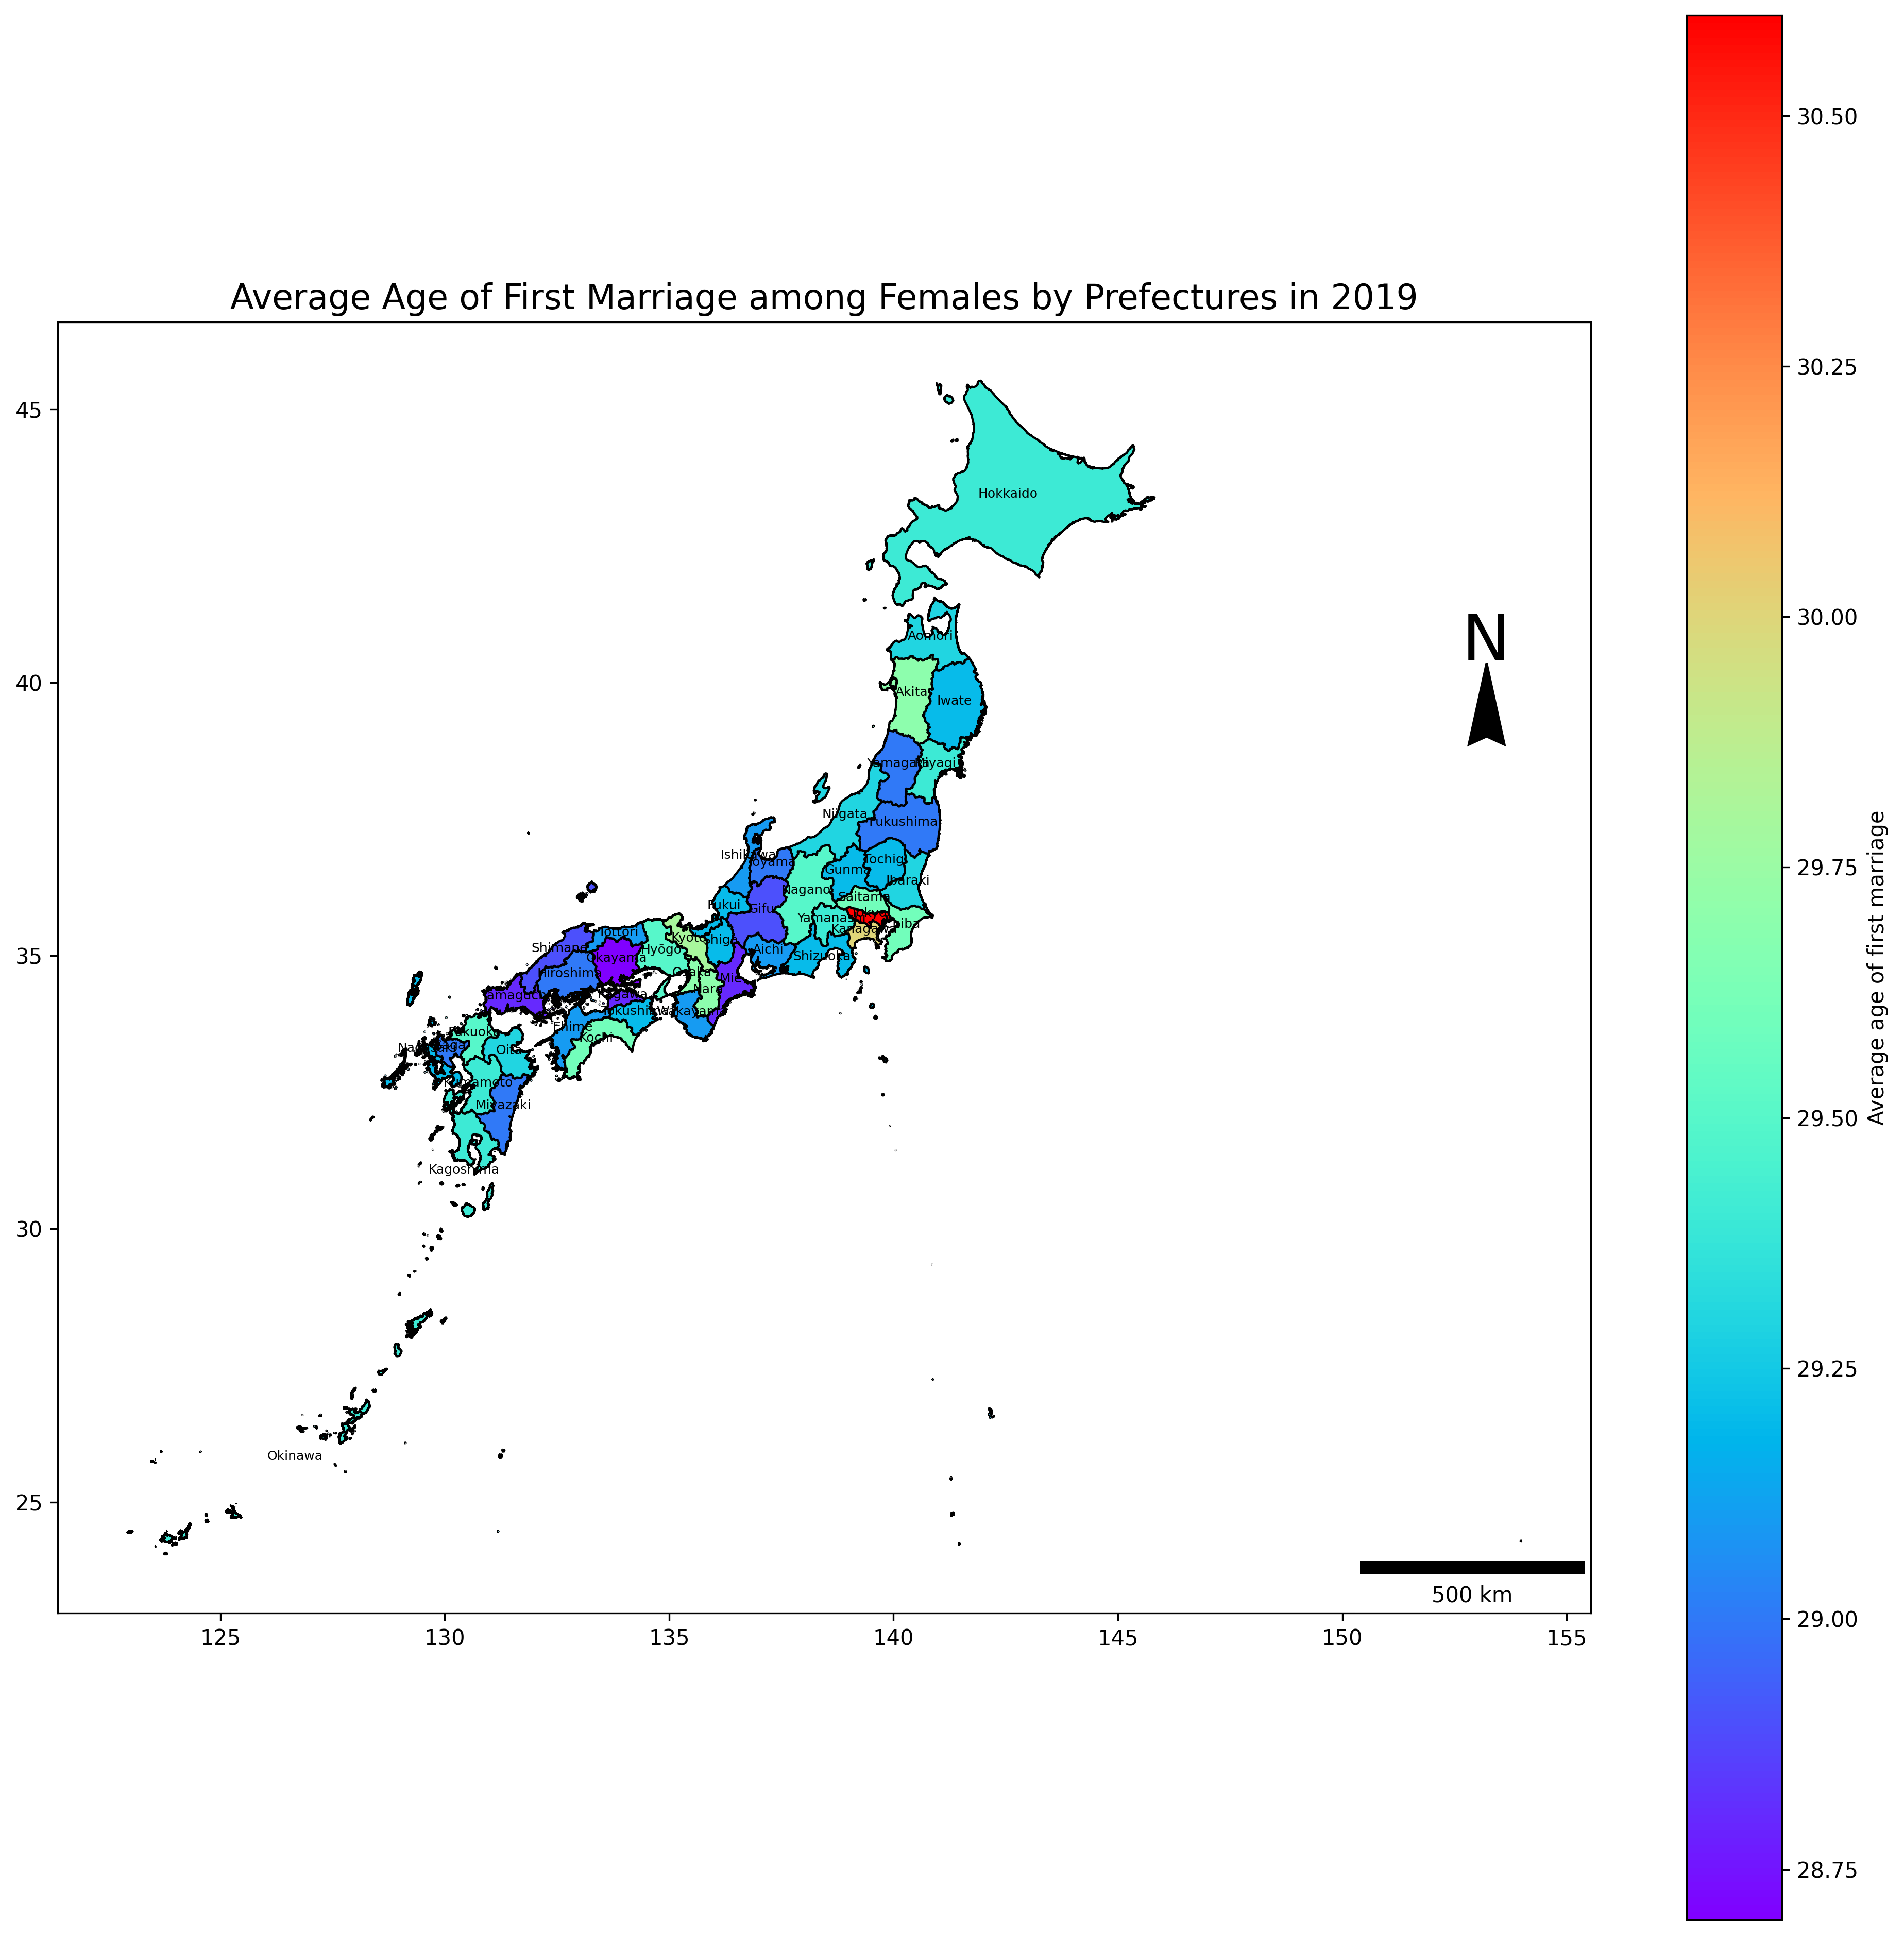

In [ ]:
# 女性の平均初婚年齢分布
# 方位の作成についての参考記事：
## https://mohammadimranhasan.com/geospatial-data-mapping-with-python/
combDf2019F = combDf.loc[(combDf.year == 2019)&(combDf.sex == 'female'), :].reset_index(drop=True).copy()
ax = combDf2019F.plot(figsize=(16, 16))
scalebar = ScaleBar(100, location='lower right', units='km')
ax.add_artist(scalebar)  # 200km
ax.text(x=153.215-0.55, y=40.4, s='N', fontsize=30)  # North Arrow
ax.arrow(153.215, 39.36, 0, 1, length_includes_head=True,
         head_width=0.8, head_length=1.5, overhang=.1, facecolor='k')  # North Arrow
[ax.annotate(row.NAME_1, row.geometry.centroid.coords[0], ha='center', color='black', size=6)
for index, row in combDf2019F.iterrows()]
combDf2019F.plot(column='avgAge', cmap='rainbow', edgecolors='black', ax=ax, legend=True, legend_kwds={'label': 'Average age of first marriage', 'orientation': 'vertical'})
plt.title('Average Age of First Marriage among Females by Prefectures in 2019', fontsize=16)
plt.show();

In [ ]:
# 男性のみを抽出（4年分）
combDf2018M = combDf.loc[(combDf.year == 2018)&(combDf.sex == 'male'), :].reset_index(drop=True).copy()
combDf2017M = combDf.loc[(combDf.year == 2017)&(combDf.sex == 'male'), :].reset_index(drop=True).copy()
combDf2016M = combDf.loc[(combDf.year == 2016)&(combDf.sex == 'male'), :].reset_index(drop=True).copy()
combDf2015M = combDf.loc[(combDf.year == 2015)&(combDf.sex == 'male'), :].reset_index(drop=True).copy()

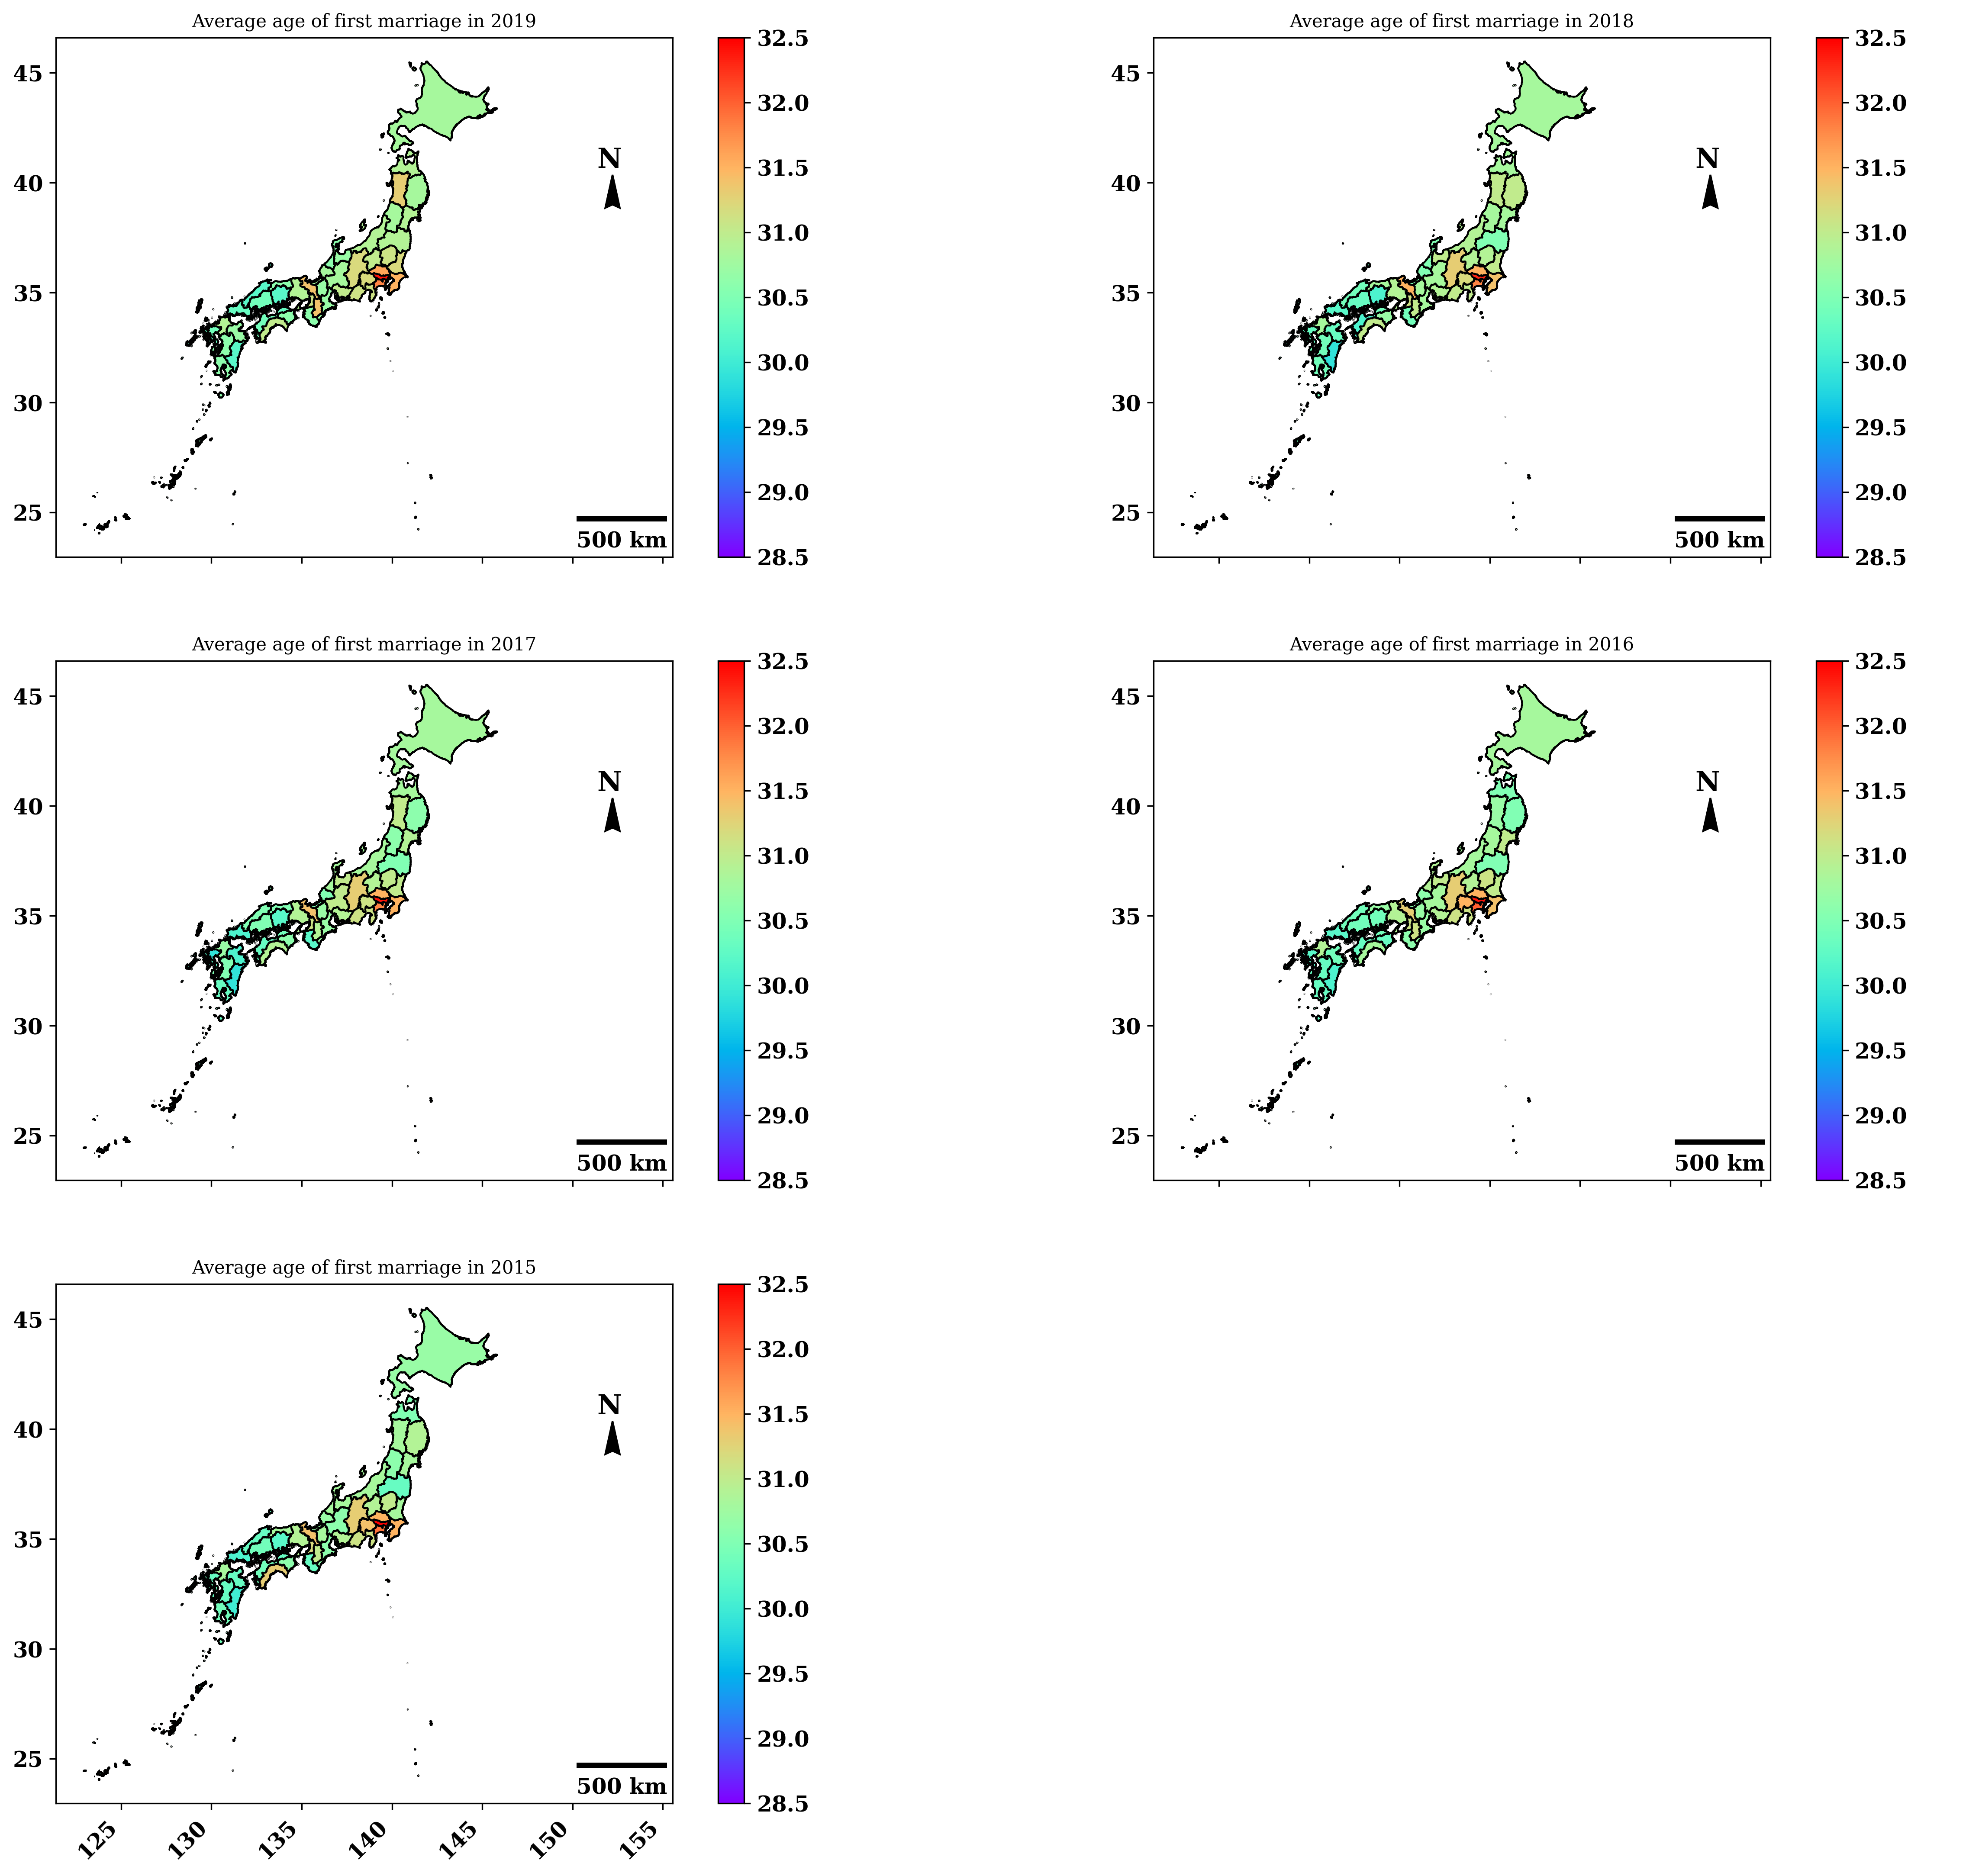

In [ ]:
with plt.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 12}):
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize = (20,20))
  fig.autofmt_xdate(rotation = 45)
  # 2019
  scalebar = ScaleBar(100, location='lower right',units='km')
  combDf2019M.plot(column='avgAge', cmap = 'rainbow', edgecolors='black', ax = ax1, legend=True,vmin=28.5, vmax=32.5)
  ax1.set_title('Average age of first marriage in 2019', fontsize=10)
  ax1.text(x=152.215-0.85, y=40.7, s='N', fontsize=15) # North Arrow
  ax1.arrow(152.215, 39.36, 0, 1, length_includes_head=True, head_width=0.8, head_length=1.5, overhang=.1, facecolor='k') # North Arrow
  ax1.add_artist(scalebar)
  # 2018
  scalebar = ScaleBar(100, location='lower right',units='km')
  combDf2018M.plot(column='avgAge', cmap = 'rainbow', edgecolors='black', ax = ax2, legend=True,vmin=28.5, vmax=32.5)
  ax2.set_title('Average age of first marriage in 2018', fontsize=10)
  ax2.text(x=152.215-0.85, y=40.7, s='N', fontsize=15) # North Arrow
  ax2.arrow(152.215, 39.36, 0, 1, length_includes_head=True, head_width=0.8, head_length=1.5, overhang=.1, facecolor='k') # North Arrow
  ax2.add_artist(scalebar)
  # 2017
  scalebar = ScaleBar(100, location='lower right',units='km')
  combDf2017M.plot(column='avgAge', cmap = 'rainbow', edgecolors='black', ax = ax3, legend=True, vmin=28.5, vmax=32.5)
  ax3.set_title('Average age of first marriage in 2017', fontsize=10)
  ax3.text(x=152.215-0.85, y=40.7, s='N', fontsize=15) # North Arrow
  ax3.arrow(152.215, 39.36, 0, 1, length_includes_head=True, head_width=0.8, head_length=1.5, overhang=.1, facecolor='k') # North Arrow
  ax3.add_artist(scalebar)
  # 2016
  scalebar = ScaleBar(100, location='lower right',units='km')
  combDf2016M.plot(column='avgAge', cmap = 'rainbow', edgecolors='black', ax = ax4, legend=True, vmin=28.5, vmax=32.5)
  ax4.set_title('Average age of first marriage in 2016', fontsize=10)
  ax4.text(x=152.215-0.85, y=40.7, s='N', fontsize=15) # North Arrow
  ax4.arrow(152.215, 39.36, 0, 1, length_includes_head=True, head_width=0.8, head_length=1.5, overhang=.1, facecolor='k') # North Arrow
  ax4.add_artist(scalebar)
  # 2015
  scalebar = ScaleBar(100, location='lower right',units='km')
  combDf2015M.plot(column='avgAge', cmap = 'rainbow', edgecolors='black', ax = ax5, legend=True, vmin=28.5, vmax=32.5)
  ax5.set_title('Average age of first marriage in 2015', fontsize=10)
  ax5.text(x=152.215-0.85, y=40.7, s='N', fontsize=15) # North Arrow
  ax5.arrow(152.215, 39.36, 0, 1, length_includes_head=True, head_width=0.8, head_length=1.5, overhang=.1, facecolor='k') # North Arrow
  ax5.add_artist(scalebar)
  # Blank
  ax6.axis('off')     # plt.tight_layout(pad=4)
# plt.show();

### 3-2-3 座標系とは

In [ ]:
# 再度日本のポリゴン読み込み
jpnShp = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Pythonで学ぶ衛星データ解析基礎-環境変化を定量的に把握しよう/data/3/gadm36_JPN_1.shp')
jpnShp.crs  # 初期値はWGS 84の地理座標系

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

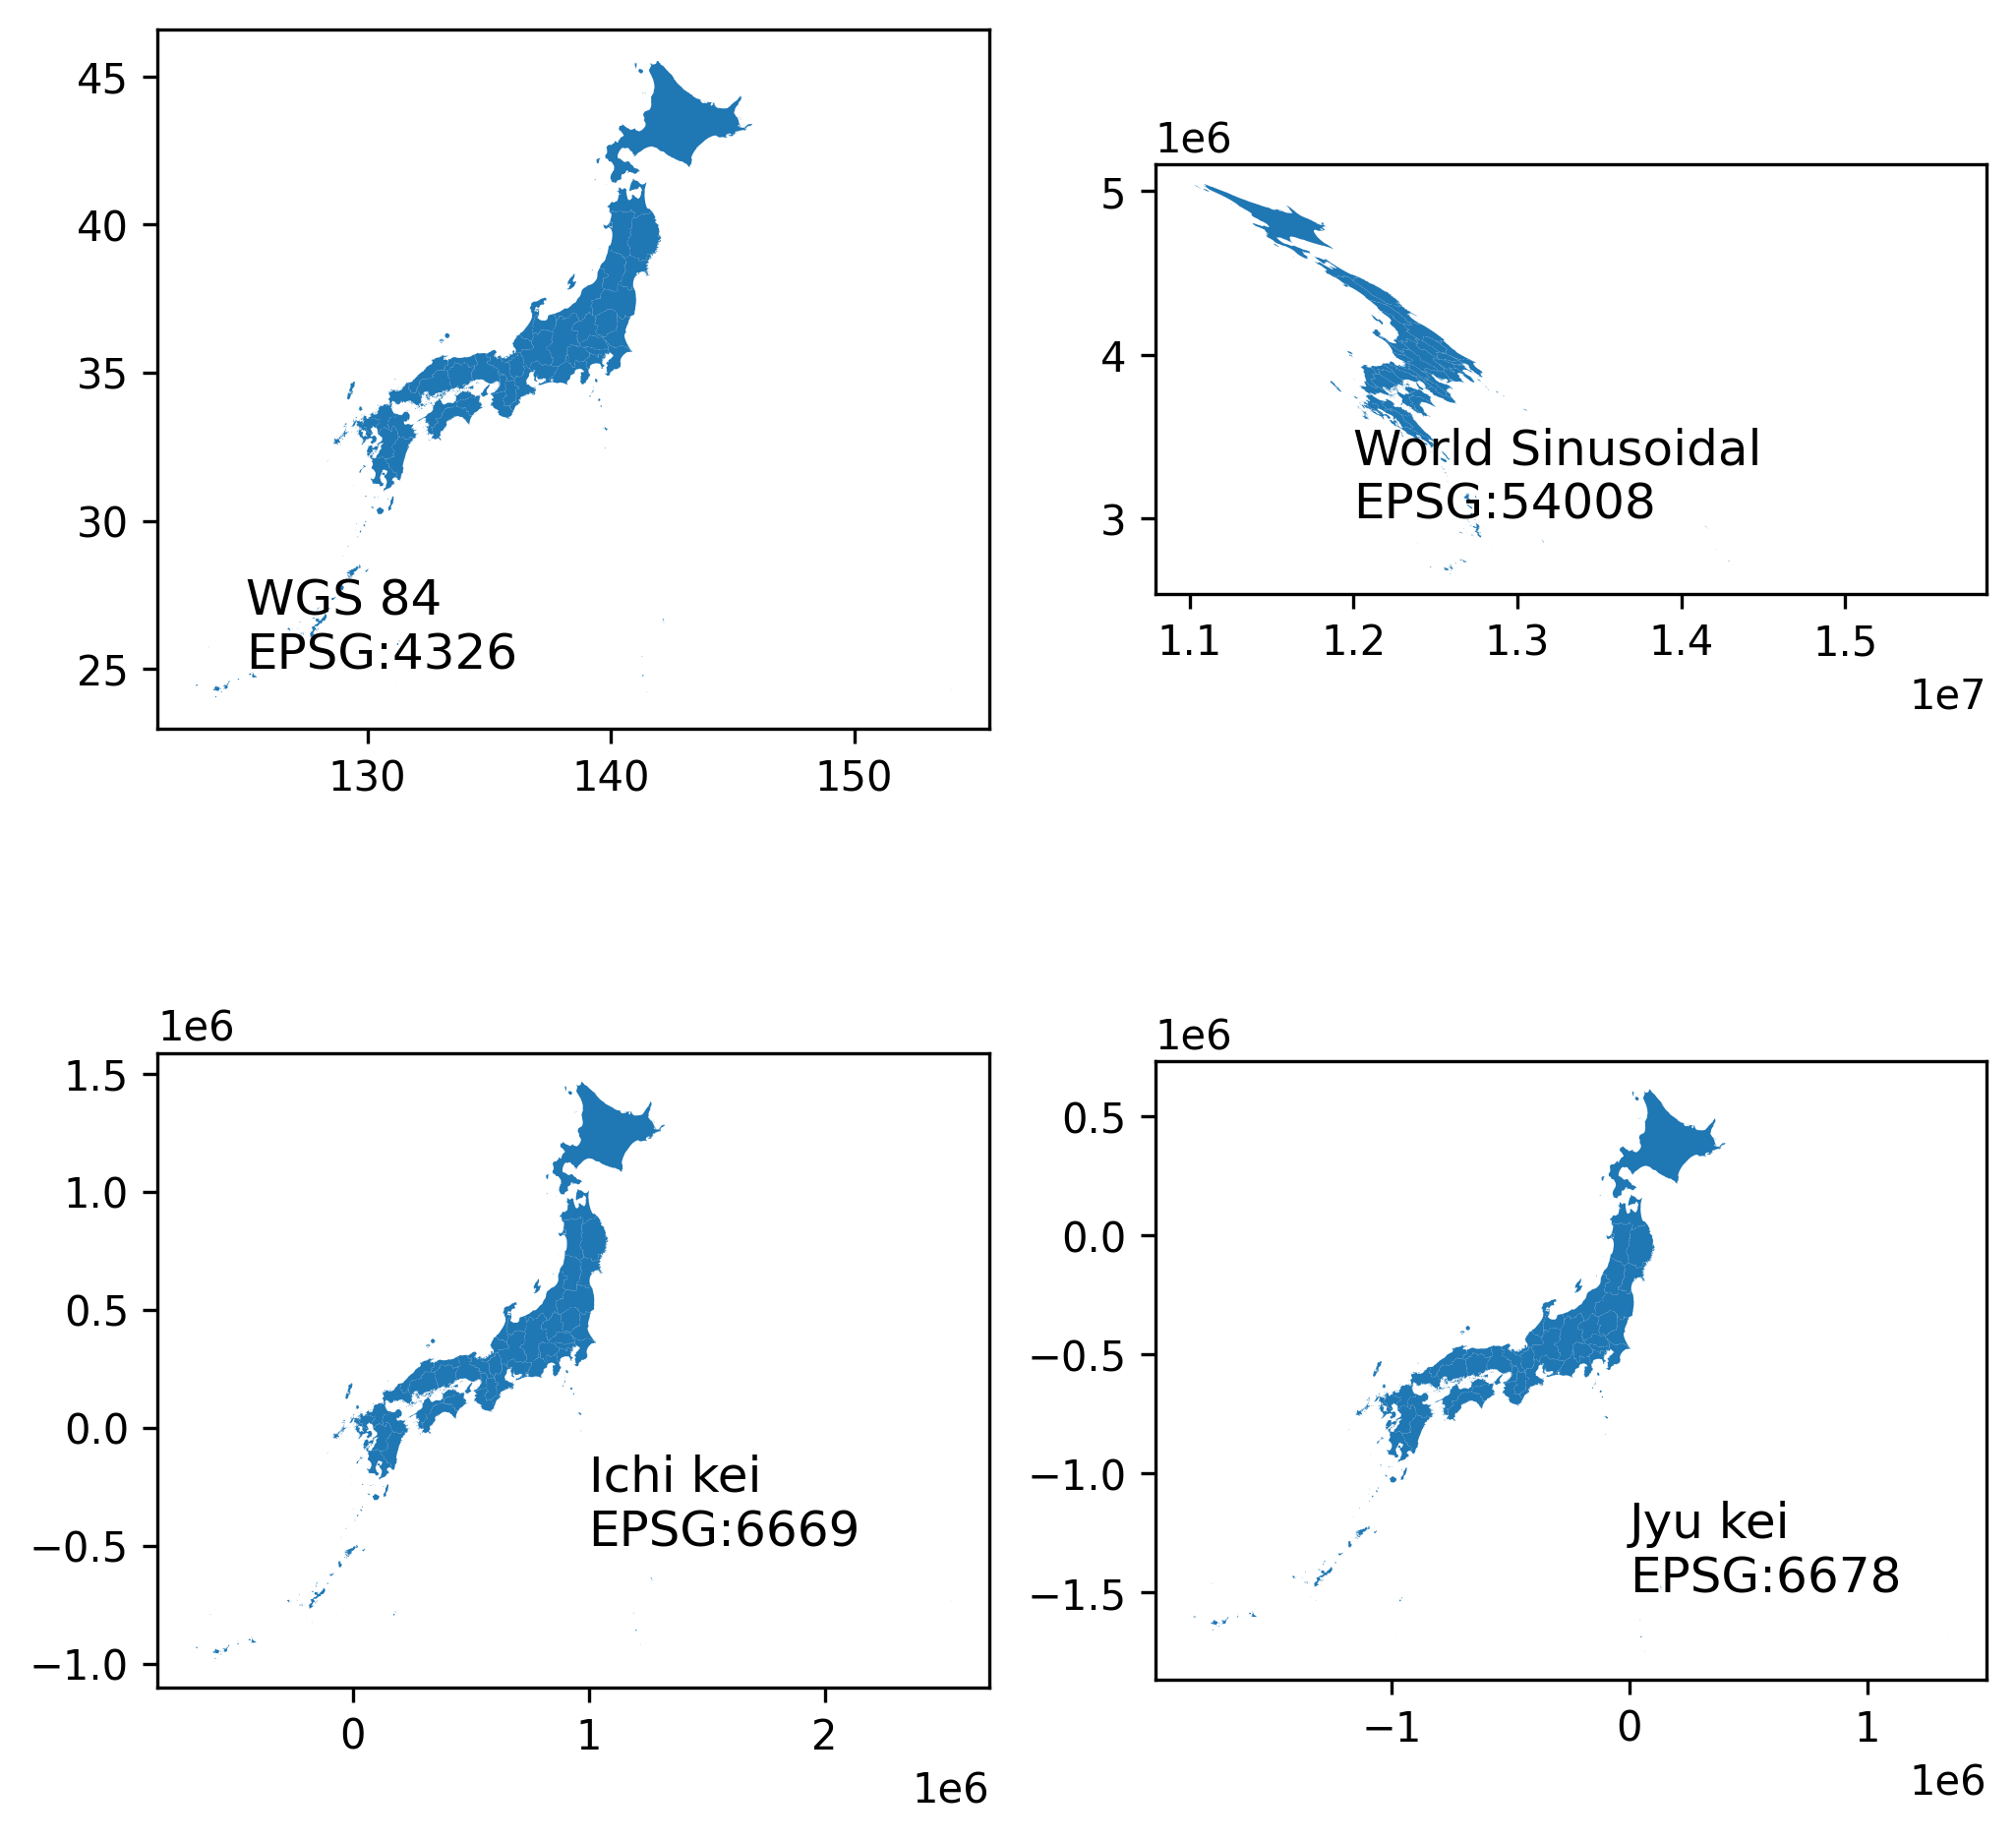

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (8, 8))

jpnShp.plot(ax=ax1)  # WGS 84
ax1.text(x=125, y=25, s='WGS 84\nEPSG:4326', fontsize=12)

# Convert 4326 to esri:54008
# World Sinusoidal
jpnShp.to_crs('esri:54008', inplace=True)
jpnShp.plot(ax=ax2)  # 6678
ax2.text(x=12000000, y=3000000, s='World Sinusoidal\nEPSG:54008', fontsize=12)

# Convert 54008 to esri:6669
# 長崎県、鹿児島県の一部に対応
jpnShp.to_crs('epsg:6669', inplace=True)
jpnShp.plot(ax=ax3)  # 6669
ax3.text(x=1000000, y=-500000, s='Ichi kei\nEPSG:6669', fontsize=12)

# Convert 6669 to 6678
# 青森県、秋田県、山形県、岩手県、宮城県
jpnShp.to_crs('epsg:6678',inplace=True)
jpnShp.plot(ax=ax4) # 6678
ax4.text(x=0, y=-1500000, s='Jyu kei\nEPSG:6678', fontsize=12)

plt.show();